In [14]:
!pip install opencv-python numpy matplotlib

In [15]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

In [16]:
images = {}
for folder in os.listdir('img'):
    for file in os.listdir(f'img/{folder}'):
        images[f'{folder.replace(' ', '-')}-{file.replace('.jpg', '')}'] = cv.imread(f'img/{folder}/{file}', cv.IMREAD_COLOR)

In [17]:
def get_sub_images(image, size):
    sub_images = []
    for i in range(0, image.shape[0], size):
        for j in range(0, image.shape[1], size):
            sub_images.append(image[i:i+size, j:j+size])
    return sub_images

images_divided = {name: get_sub_images(image, 56) for name, image in images.items()}

In [18]:
images_divided_hist = {}
color = ('b','g','r')
for name, img in images_divided.items():
    hist = []
    for sub_img in img:
        histr = []
        for i, col in enumerate(color):
            histr.append(cv.calcHist([sub_img], [i], None, [256], [0, 256]))
        hist.append(histr)
    images_divided_hist[name] = hist

In [19]:
selected_img = 'three-of-hearts-4'

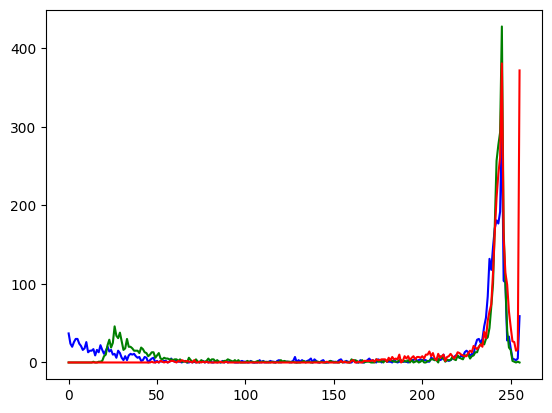

In [20]:
for i, col in enumerate(color):
    plt.plot(images_divided_hist[selected_img][0][i], color=col)
plt.show()

In [21]:
def calculate_distance_sub_img(sub_img1, sub_img2):
    distance = 0
    for i in range(3):
        distance += cv.compareHist(sub_img1[i], sub_img2[i], cv.HISTCMP_CHISQR)
    return distance / 3

In [22]:
def calculate_distance_img(img1, img2):
    distance = 0
    for i in range(len(img1)):
        distance += calculate_distance_sub_img(img1[i], img2[i])
    return distance / len(img1)

In [23]:
def calculate_distances_to_all_images(img, images):
    dist = [(name, calculate_distance_img(img, img2)) for name, img2 in images.items()]
    dist.sort(key=lambda x: x[1])
    return dist

In [24]:
distances = calculate_distances_to_all_images(images_divided_hist[selected_img], images_divided_hist)

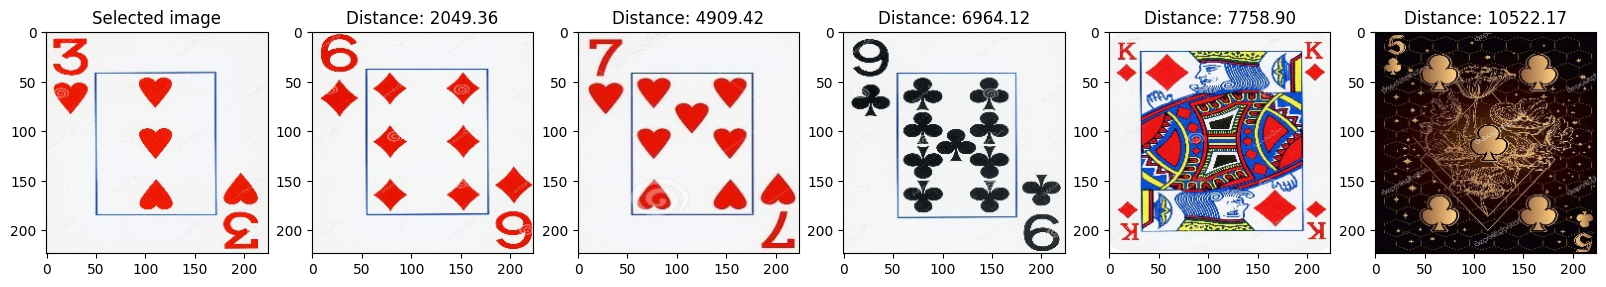

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot with the 5 most similar images to the one we selected
fig, ax = plt.subplots(1, 6, figsize=(20, 5))
ax[0].imshow(cv.cvtColor(images[selected_img], cv.COLOR_BGR2RGB))
ax[0].set_title('Selected image')
for i in range(1, 6):
    ax[i].imshow(cv.cvtColor(images[distances[i][0]], cv.COLOR_BGR2RGB))
    ax[i].set_title(f'Distance: {distances[i][1]:.2f}')
plt.show()
plt.clf()